In [ ]:
pip install 

Note: you may need to restart the kernel to use updated packages.
ERROR: Invalid requirement: "'jupyter-nbconvert'"


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [ ]:
df = pd.read_csv('C:/Users/91707/OneDrive - LNMIIT/cod/data_Sci/cars_price.csv')

In [ ]:
train = df.copy()

In [ ]:
train

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,jeep,grand-cherokee,12500,2008,with mileage,214000.0,petrol,3700.0,silver,auto,all-wheel drive,J
39996,39996,peugeot,607,4754,2001,with mileage,295000.0,petrol,2200.0,blue,mechanics,front-wheel drive,E
39997,39997,mercedes-benz,c-klass,4000,1999,with mileage,0.0,diesel,2200.0,other,mechanics,rear drive,D
39998,39998,proton,persona,1200,1996,with mileage,250000.0,petrol,1300.0,other,mechanics,front-wheel drive,NaN


getting the idea of the share of each feature of a column

In [ ]:
df = df.drop('model',axis = 1)

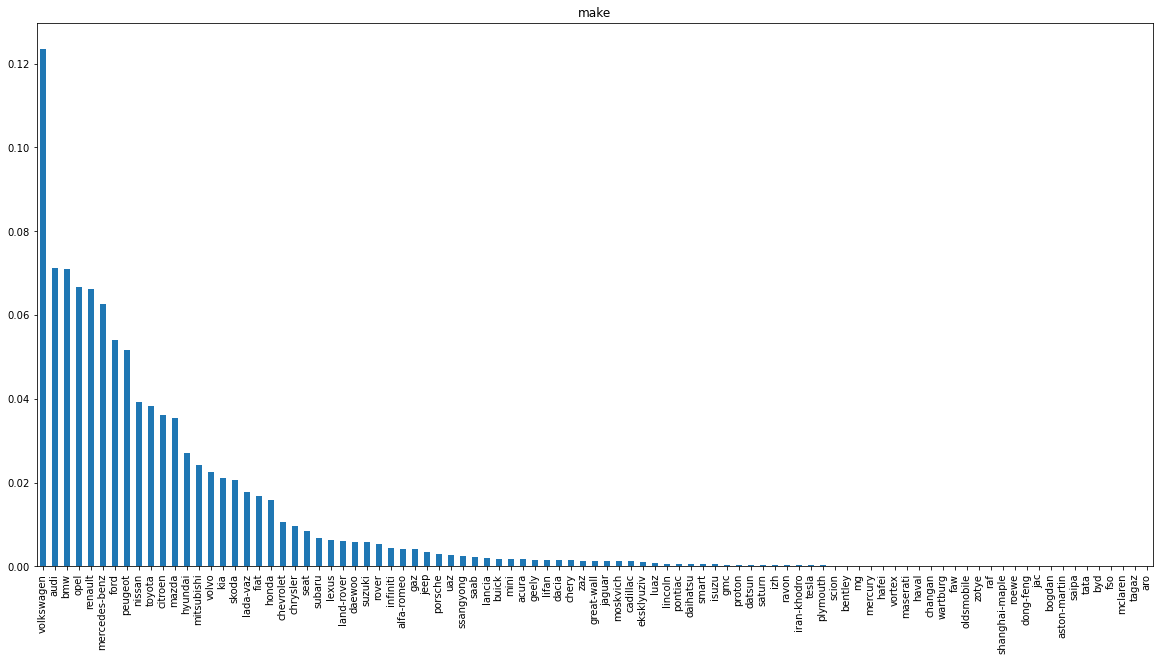

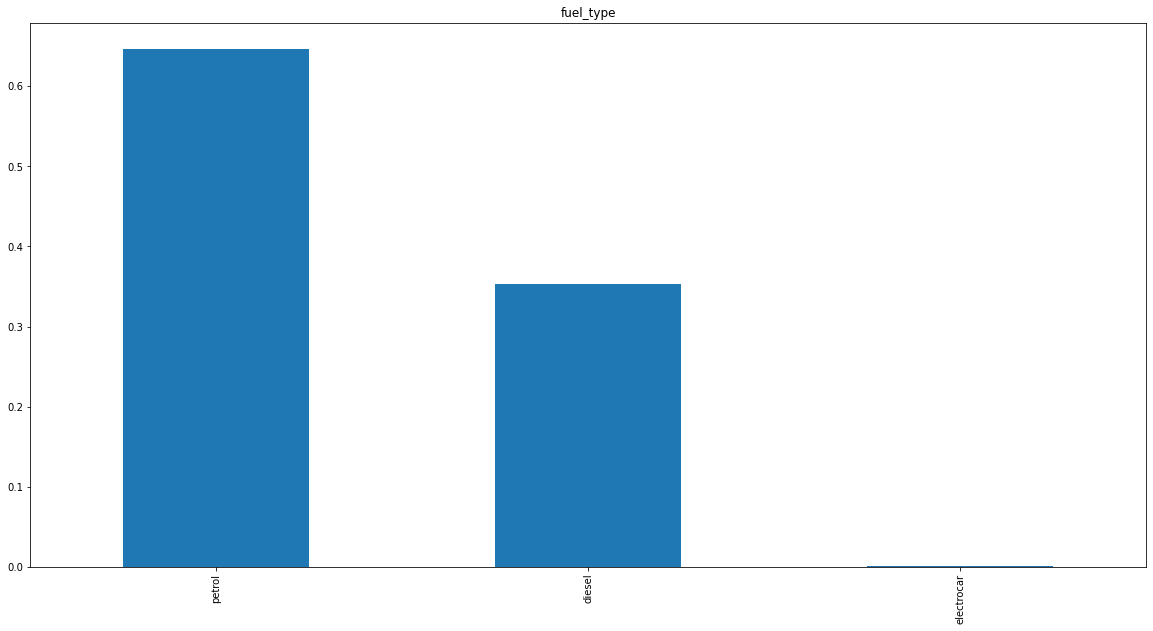

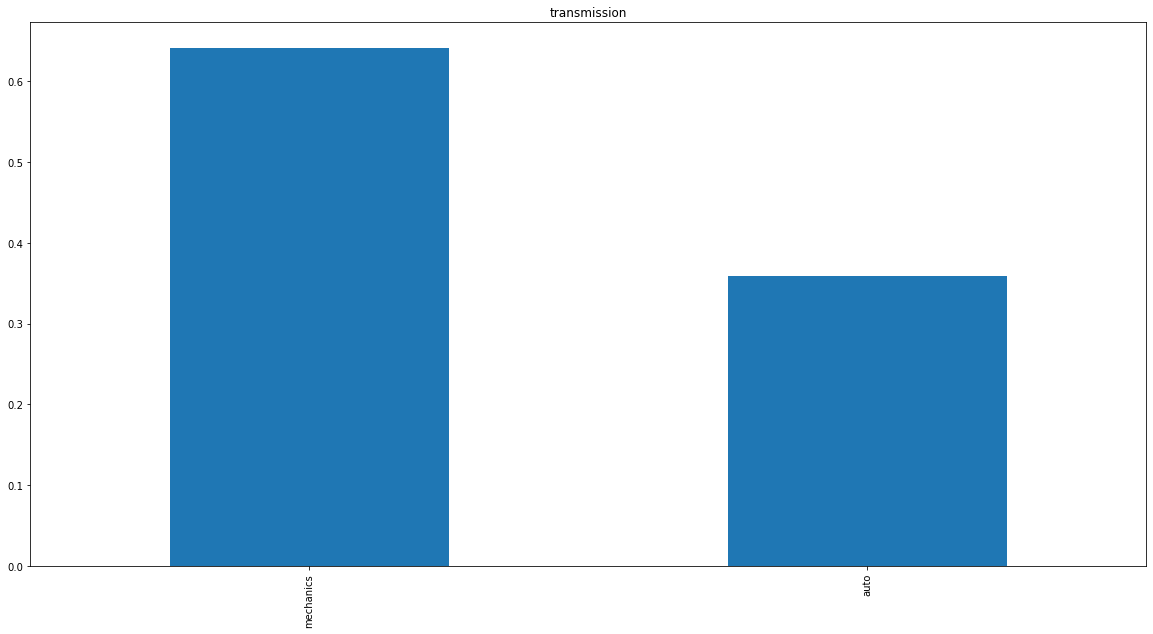

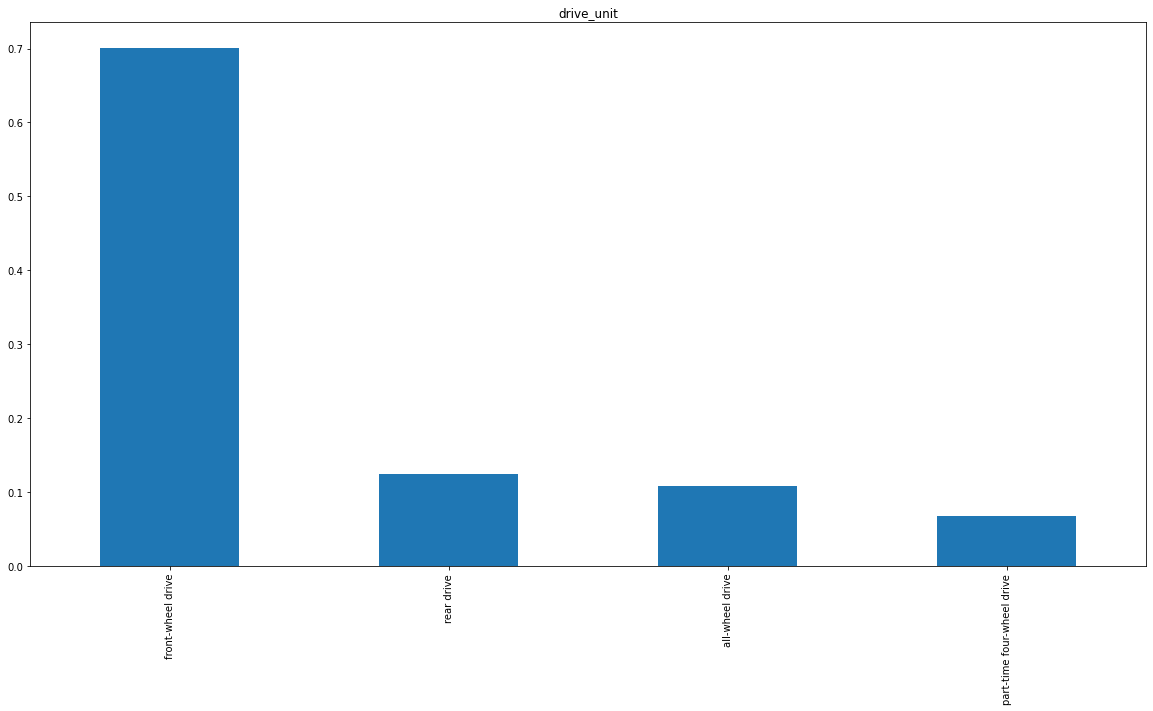

In [ ]:
train['make'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "make")
plt.show()
train['fuel_type'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "fuel_type")
plt.show()
train['transmission'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "transmission")
plt.show()
train['drive_unit'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "drive_unit")
plt.show()

from the above plots we can consider that

1.   weightage of brand in the data set means the number of cars the brand has sold
2.  petrol ,deisel, electric
1.   auto or mechanical
2.   type of drive






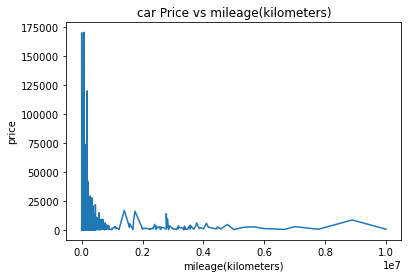

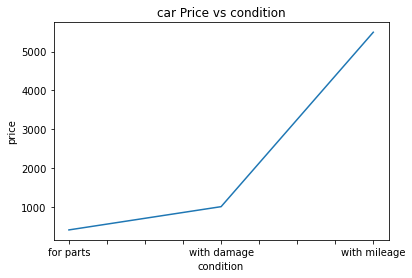

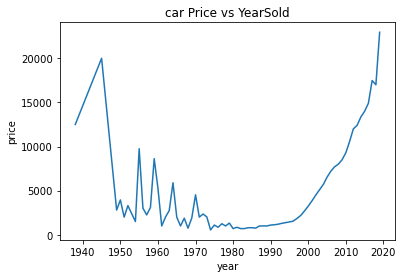

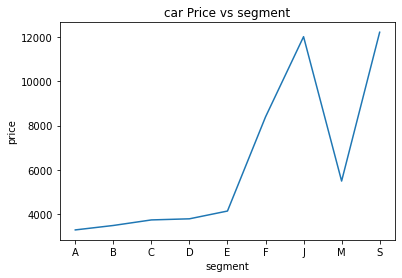

In [ ]:
train.groupby('mileage(kilometers)')['priceUSD'].median().plot()
plt.xlabel('mileage(kilometers)')
plt.ylabel('price')
plt.title("car Price vs mileage(kilometers)")
plt.show()


train.groupby('condition')['priceUSD'].median().plot()
plt.xlabel('condition')
plt.ylabel('price')
plt.title("car Price vs condition")
plt.show()


train.groupby('year')['priceUSD'].median().plot()
plt.xlabel('year')
plt.ylabel('price')
plt.title("car Price vs YearSold")
plt.show()


train.groupby('segment')['priceUSD'].median().plot()
plt.xlabel('segment')
plt.ylabel('price')
plt.title("car Price vs segment")
plt.show()

from the above plots we can clearly consider that 


1.   the price is high for the cars which have low mileage or which are travelled less kilometers
2.   the price decreased significantly in 1980s but afterwards ,it again rose
1.   the S segment mostly have a high price and segment A has lower.

**removing the nan valus**

In [ ]:
from statistics import mode
l = []
for i in df['segment']:
    if i != math.nan:
        l.append(i)
seg_mode = mode(l)

l = []
for i in df['volume(cm3)']:
    if i != math.nan:
        l.append(i)
vol_mode = (mode(l))

l = []

for i in df['drive_unit']:
    if i != math.nan:
        l.append(i)
drive_unit_mode =  mode(l)

In [ ]:
for j in df.columns:
    print(j)
    ct = 0
    for i in range(len(df)) :
        if type(df[j][i]) != type('sdf'):
            if math.isnan(df[j][i]):
                if(j == 'volume(cm3)'):
                    df[j][i] = vol_mode
                if(j == 'drive_unit'):
                    df[j][i] = drive_unit_mode
                if(j == 'segment'):
                    df[j][i] = seg_mode
                #print('NaN')
                ct+=1
    print(ct)

Unnamed: 0
0
make
0
priceUSD
0
year
0
condition
0
mileage(kilometers)
0
fuel_type
0
volume(cm3)
30
color
0
transmission
0
drive_unit
1345
segment
3755


In [ ]:
train =df.copy()

**getting the dummie variables**

In [ ]:
train = pd.get_dummies(train)

In [ ]:
train

,Unnamed: 0,priceUSD,year,mileage(kilometers),volume(cm3),make_acura,make_alfa-romeo,make_aro,make_aston-martin,make_audi,...,drive_unit_rear drive,segment_A,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,0,565,1993,960015.0,2000.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,5550,2008,172000.0,1400.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,8300,2008,223000.0,2500.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,3300,2005,140000.0,1200.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,2450,2002,413000.0,2200.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,12500,2008,214000.0,3700.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39996,39996,4754,2001,295000.0,2200.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39997,39997,4000,1999,0.0,2200.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
39998,39998,1200,1996,250000.0,1300.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
import math

spliting the test and train data

In [ ]:
test = train.iloc[:math.ceil(len(train)*0.2),:]
train_  = train.iloc[math.ceil(len(train)*0.2):,:]

In [ ]:
y_test = test.priceUSD
test.drop('priceUSD',axis = 1)

,Unnamed: 0,year,mileage(kilometers),volume(cm3),make_acura,make_alfa-romeo,make_aro,make_aston-martin,make_audi,make_bentley,...,drive_unit_rear drive,segment_A,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,0,1993,960015.0,2000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,2008,172000.0,1400.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,2008,223000.0,2500.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,2005,140000.0,1200.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,2002,413000.0,2200.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7995,1985,224000.0,1600.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7996,7996,1988,358759.0,1800.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7997,7997,2008,162000.0,1600.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7998,7998,2004,355000.0,2200.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
train_np = train_.to_numpy()
test_np = test.to_numpy()
y_train = train_.priceUSD
y_train = y_train.to_numpy()

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
regressor = xgboost.XGBRegressor()

choosing the hyper parameters for the xgboost

In [2]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
len(y_train)

32000

In [ ]:
random_cv.fit(train_np,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 25.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 51.6min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 80.2min finished
[18:48:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=15,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=None,
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)

In [ ]:
regressor = xgboost.XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=15,
             min_child_weight=2, missing=math.nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=None,
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)

training with the best hyperparameters



In [ ]:
regressor.fit(train_np,y_train)

[23:08:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=15,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=None,
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)

In [ ]:
import pickle

In [ ]:
filename= 'finalized_model_xgbregressor.pkl'
pickle.dump(regressor,open(filename,'wb'))

In [ ]:
y_pred = regressor.predict(test_np)

In [ ]:
y_pred

array([  565.37006,  5550.1167 ,  8299.957  , ...,  6899.8774 ,
        4989.9194 , 11499.901  ], dtype=float32)

MSE of 1.76 which is pretty good

In [ ]:
from sklearn.metrics import mean_squared_error
print(len(train_np))
mean_squared_error(y_test,y_pred)


32000


1.7689656162685132

In [ ]:
test['predicted_price'] = y_pred

In [ ]:
p =test.priceUSD
test.drop('priceUSD',axis=1)
test['original price'] = p


In [ ]:
test1 = test[['original price','predicted_price']]

In [ ]:
test1

,original price,predicted_price
0,565,565.370056
1,5550,5550.116699
2,8300,8299.957031
3,3300,3299.957520
4,2450,2449.886719
...,...,...
7995,10000,10000.920898
7996,1200,1200.553467
7997,6900,6899.877441
7998,4990,4989.919434


exporting the csv file of predicted and original prices

In [ ]:
test1.to_csv('C:/Users/91707/OneDrive - LNMIIT/cod/data_Sci/intern_assign_test.csv')